# Favourite BMW

In [125]:
import pandas as pd 

df = pd.read_csv('BMW sales data (2010-2024).csv')
df


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [126]:
# checks for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [127]:
df['Model'].value_counts().keys()

Index(['7 Series', 'i3', 'i8', '3 Series', '5 Series', 'X1', 'X3', 'X5', 'M5',
       'X6', 'M3'],
      dtype='object', name='Model')

In [128]:
# create a body type column from model column

def map_bmw(model_name):
    m = model_name.upper()
    
    if m.startswith('X') or 'IX' in m:
        return 'SUV'
    if m.startswith('M'):
        return 'Saloon'
    if 'I3' in m:
        return 'Hatchback'
    if '3 SERIES' in m or '5 SERIES' in m or '7 SERIES' in m:
        return 'Saloon'
    if 'I8' in m:
        return 'Coupe'
        
    return 'Other'

df['body_type'] = df['Model'].apply(map_bmw)
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,body_type
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,Saloon
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,Coupe
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,Saloon
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,SUV
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,Saloon
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,Hatchback
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,Hatchback
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,Saloon
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,Hatchback


In [129]:
# keep only the manual cars 
df = df[df['Transmission'] =='Manual']
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,body_type
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,Saloon
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,Saloon
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low,Saloon
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High,Coupe
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low,Coupe
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,5 Series,2013,Europe,Grey,Petrol,Manual,4.7,155013,80263,3700,Low,Saloon
49994,5 Series,2010,North America,Silver,Petrol,Manual,3.6,56672,32990,1575,Low,Saloon
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,Hatchback
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,Hatchback


In [130]:
#keep only the saloon cars
df = df[df['body_type'] == 'Saloon']
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,body_type
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,Saloon
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,Saloon
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low,Saloon
10,3 Series,2012,Middle East,White,Electric,Manual,2.4,101595,117995,500,Low,Saloon
13,5 Series,2020,Africa,White,Electric,Manual,2.3,163444,119486,4668,Low,Saloon
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,5 Series,2019,North America,White,Diesel,Manual,4.5,48562,31520,7108,High,Saloon
49987,M3,2017,Asia,Black,Hybrid,Manual,1.7,9311,56421,1216,Low,Saloon
49989,5 Series,2015,Africa,Grey,Electric,Manual,3.4,148049,90050,7710,High,Saloon
49993,5 Series,2013,Europe,Grey,Petrol,Manual,4.7,155013,80263,3700,Low,Saloon


In [131]:
#remove electric cars
df = df[df['Fuel_Type'].isin(['Petrol','Diesel','Hybrid'])]
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,body_type
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,Saloon
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,Saloon
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low,Saloon
15,M3,2014,North America,Silver,Hybrid,Manual,3.0,154050,94997,7765,High,Saloon
26,M3,2015,Asia,Red,Hybrid,Manual,2.0,41514,116902,8897,High,Saloon
...,...,...,...,...,...,...,...,...,...,...,...,...
49981,M3,2013,Europe,Silver,Hybrid,Manual,1.7,128784,47367,3936,Low,Saloon
49984,5 Series,2019,North America,White,Diesel,Manual,4.5,48562,31520,7108,High,Saloon
49987,M3,2017,Asia,Black,Hybrid,Manual,1.7,9311,56421,1216,Low,Saloon
49993,5 Series,2013,Europe,Grey,Petrol,Manual,4.7,155013,80263,3700,Low,Saloon


#  Data Visualization

In [132]:
import matplotlib.pyplot as plt 
import seaborn as sns 

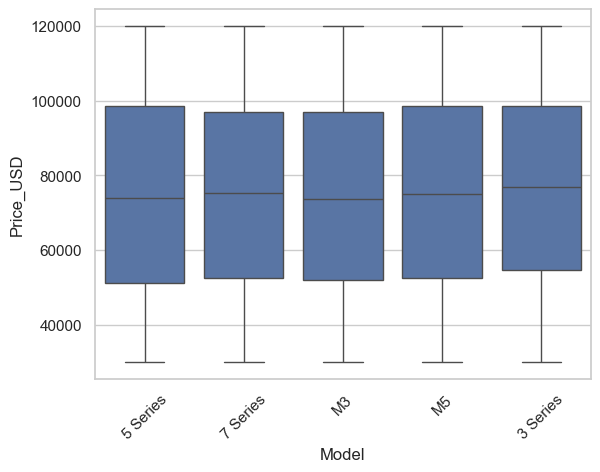

In [133]:
sns.boxplot(x='Model',y='Price_USD',data=df)
plt.xticks(rotation=45)
plt.show()

The boxplot shows the distribution of prices for each model.

.The line shows the median price. 

.If the box is tall prices vary a lot . If the box is short prices are more consistent.

.The whisker show minimum and maximum prices.

skewness: -0.004681570907203149


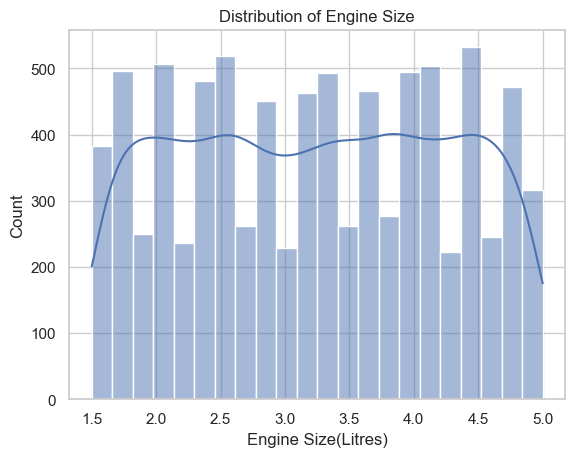

In [134]:
skew_value = df['Engine_Size_L'].skew()
print('skewness:',skew_value)

sns.histplot(df['Engine_Size_L'],kde=True)
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size(Litres)') 
plt.show()

.There is no strong tail to the left or right .

.Small and large engines are fairly evenly distributed.

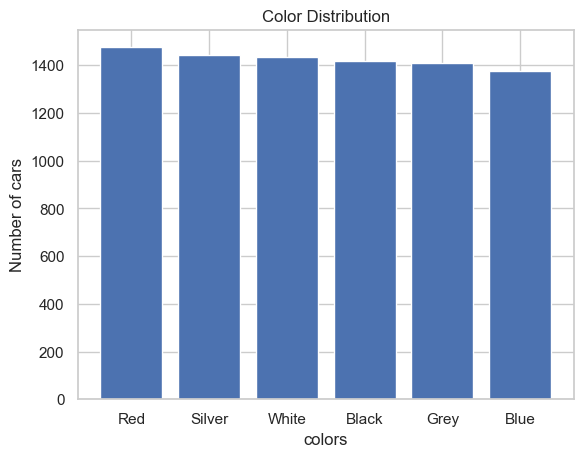

In [152]:
x = df['Color'].value_counts().keys()
y = df['Color'].value_counts().tolist()

plt.bar(x,y)
plt.title('Color Distribution')
plt.xlabel('colors')
plt.ylabel('Number of cars')
plt.show()
